# Checking the functions of the pipeline

Imports

In [78]:
from src.unify_format import unify_data_format
from src.variable_matching import match_variables
from src.temporal_resolution import consolidate_time_resolution
from src.match import aggregate_and_merge_files

import os
import xarray as xr

import src.config

Downloading data

In [79]:
file_path_MetO = "/Users/bean/Documents/Doctorate/Fall_24/Mokbel8735_Adv_Databases/climate_data_integration/data/raw/HadISST.2.2.0.0_sea_ice_concentration.nc"
met = xr.open_dataset(file_path_MetO)

file_path_NOAA = "/Users/bean/Documents/Doctorate/Fall_24/Mokbel8735_Adv_Databases/climate_data_integration/data/raw/icec.mon.mean.nc"
noa = xr.open_dataset(file_path_NOAA)

### Standardizing variable names
**match_variables**

Current file column names:

In [3]:
met.dims.keys()

/var/folders/mr/2yqg72xx2l3bscg4fdjn78_c0000gn/T/ipykernel_10972/2489301570.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  met.dims.keys()


KeysView(FrozenMappingWarningOnValuesAccess({'time': 2048, 'nv': 2, 'latitude': 180, 'longitude': 360}))

In [4]:
met.data_vars.keys()

KeysView(Data variables:
    time_bnds  (time, nv) float32 16kB ...
    sic        (time, latitude, longitude) float32 531MB ...)

In [5]:
noa.dims.keys()

/var/folders/mr/2yqg72xx2l3bscg4fdjn78_c0000gn/T/ipykernel_10972/2353949293.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  noa.dims.keys()


KeysView(FrozenMappingWarningOnValuesAccess({'lat': 180, 'lon': 360, 'time': 2040}))

In [6]:
noa.data_vars.keys()

KeysView(Data variables:
    icec     (time, lat, lon) float32 529MB ...)

In [3]:
st = match_variables(input_data=[file_path_MetO, file_path_NOAA], standard_col_names=src.config.standard_col_names)

/Users/bean/Documents/Doctorate/Fall_24/Mokbel8735_Adv_Databases/climate_data_integration/src/variable_matching.py:42: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for current_name in data.dims.keys():  # Check dimension names
/Users/bean/Documents/Doctorate/Fall_24/Mokbel8735_Adv_Databases/climate_data_integration/src/variable_matching.py:42: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for current_name in data.dims.keys():  # Check dimension names


In [4]:
new_met = xr.open_dataset(st[0])
print(new_met.dims.keys())
print(new_met.data_vars.keys())
new_noa = xr.open_dataset(st[1])
print(new_noa.dims.keys())
print(new_noa.data_vars.keys())

KeysView(FrozenMappingWarningOnValuesAccess({'datetime': 2048, 'latitude': 180, 'longitude': 360}))
KeysView(Data variables:
    sea_ice_temp  (datetime, latitude, longitude) float32 531MB ...)
KeysView(FrozenMappingWarningOnValuesAccess({'latitude': 180, 'longitude': 360, 'datetime': 2040}))
KeysView(Data variables:
    sea_ice_temp  (datetime, latitude, longitude) float32 529MB ...)


/var/folders/mr/2yqg72xx2l3bscg4fdjn78_c0000gn/T/ipykernel_11212/1962799246.py:2: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(new_met.dims.keys())
/var/folders/mr/2yqg72xx2l3bscg4fdjn78_c0000gn/T/ipykernel_11212/1962799246.py:5: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(new_noa.dims.keys())


### Get same file format and check the grid map information
**unify_data_format**

In [5]:
u_data_0, g_0 = unify_data_format(st[0])
u_data_1, g_1 = unify_data_format(st[1])

In [10]:
print(u_data_1)

/Users/bean/Documents/Doctorate/Fall_24/Mokbel8735_Adv_Databases/climate_data_integration/data/processed/st_cols_icec.mon.mean.nc


In [11]:
print(g_1)

No CRS or grid mapping information found in the file.


### Resample datasets into monthly resolution
**consolidate_time_resolution**

In [80]:
m_0 = consolidate_time_resolution(u_data_0)
m_1 = consolidate_time_resolution(u_data_1)

	Temporal resolution: M


PermissionError: [Errno 13] Permission denied: '/Users/bean/Documents/Doctorate/Fall_24/Mokbel8735_Adv_Databases/climate_data_integration/data/processed/monthly_st_cols_HadISST.2.2.0.0_sea_ice_concentration.nc'

In [81]:
ds_0 = xr.open_dataset(m_0)
ds_0

<xarray.Dataset> Size: 531MB
Dimensions:       (datetime: 2048, latitude: 180, longitude: 360)
Coordinates:
  * latitude      (latitude) float32 720B 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * longitude     (longitude) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * datetime      (datetime) datetime64[ns] 16kB 1850-01-31 ... 2020-08-31
Data variables:
    sea_ice_temp  (datetime, latitude, longitude) float32 531MB ...
Attributes:
    Title:                      Monthly 1 degree version of HadISST.2.2.0.0
    source:                     Met Office
    reference:                  update of Titchner and Rayner 2015 DOI: 10.10...
    Conventions:                CF-1.0
    history:                    5/10/2020 converted to netcdf
    supplementary_information:  contact holly.titchner@metoffice.gov.uk or jo...

In [82]:
ds_1 = xr.open_dataset(m_1)
ds_1

<xarray.Dataset> Size: 529MB
Dimensions:       (datetime: 2040, latitude: 180, longitude: 360)
Coordinates:
  * latitude      (latitude) float32 720B 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * longitude     (longitude) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * datetime      (datetime) datetime64[ns] 16kB 1850-01-31 ... 2019-12-31
Data variables:
    sea_ice_temp  (datetime, latitude, longitude) float32 529MB ...
Attributes:
    title:            created 05/2014 from data provided by JRA
    history:          Created 12/2012 from data obtained from JRA by ESRL/PSD
    platform:         Analyses
    citation:         Hirahara, S., Ishii, M., and Y. Fukuda,2014: Centennial...
    institution:      NOAA ESRL/PSD
    Conventions:      CF-1.2
    dataset_title:    COBE-SST2 Sea Surface Temperature and Ice
    original_source:  https://climate.mri-jma.go.jp/pub/ocean/cobe-sst2/
    References:       https://www.psl.noaa.gov/data/gridded/cobe2.html

### Aggregating and merging files
**aggregate_and_merge_files**

In [83]:
"""
Detect and handle duplicate records using user-defined rules (e.g., averaging, retaining max/min values).
"""
import os
import json
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import src.config

def drop_unwanted_dims(ds):
    """
    Drops any dimension from the dataset that is not in the list of dimensions to keep.

    Args:
        ds (xarray.Dataset): The dataset from which to drop dimensions.

    Returns:
        xarray.Dataset: The dataset with unwanted dimensions dropped.
    """
    keep_dims = ['datetime', 'latitude', 'longitude', 'sea_ice_temp']
    drop_dims = [dim for dim in ds.dims if dim not in keep_dims]
    ds = ds.drop_dims(drop_dims, errors="ignore")  # Avoid errors if a dimension is already dropped
    return ds

def align_datasets(ds1, ds2):
    """
    Compare a specific variable across two xarray datasets where the specified dimensions align.

    Args:
        ds1 (xarray.Dataset): The first dataset.
        ds2 (xarray.Dataset): The second dataset.
        variable (str): The name of the variable to compare.

    Returns:
        xarray.DataArray: The difference of the variable in aligned datasets.
    """
    # Align the datasets on the specified dimensions
    ds1, ds2 = xr.align(ds1, ds2, join="inner")
    
    return ds1, ds2

def find_common_overlap_indices(ds1, ds2, dim):
    """
    Finds the indices where two xarray datasets overlap across all specified dimensions.

    Args:
        ds1 (xarray.Dataset): The first dataset.
        ds2 (xarray.Dataset): The second dataset.
        dims (tuple): A tuple of dimension names to check for overlap.

    Returns:
        tuple: Two arrays of indices corresponding to ds1 and ds2 where all dimensions overlap.
    """
    

    if dim not in ds1.dims or dim not in ds2.dims:
        raise ValueError(f"Dimension '{dim}' not found in one or both datasets.")
    
    # Find overlapping values for the dimension
    overlap_values = np.intersect1d(ds1[f"{dim}"].values, ds2[f"{dim}"].values)

    idx_ds1 = np.where(np.isin(ds1[dim].values, overlap_values))[0]
    n_idx_ds1 = np.where(~np.isin(ds1[dim].values, overlap_values))[0]

    idx_ds2 = np.where(np.isin(ds2[dim].values, overlap_values))[0]
    n_idx_ds2 = np.where(~np.isin(ds2[dim].values, overlap_values))[0]

    if dim == "datetime":
        ds1 = ds1.isel(datetime=idx_ds1)
        ds2 = ds2.isel(datetime=idx_ds2)
    elif dim == "latitude":
        ds1 = ds1.isel(latitude=idx_ds1)
        ds2 = ds2.isel(latitude=idx_ds2)
    else:
        ds1 = ds1.isel(longitude=idx_ds1)
        ds2 = ds2.isel(longitude=idx_ds2)

    return idx_ds1, idx_ds2, n_idx_ds1, n_idx_ds2

def aggregate_and_merge_files(file_list, scaling_factors, output_file, aggregation_func, variable):
    """
    Aggregate and merge a list of NetCDF files into one file, considering overlapping regions.
    Saves the merged dataset to 'output_file'.
    
    Args:
        file_list (list): List of file paths to NetCDF files.
        scaling_factors (list): List of scaling factors (floats) corresponding to the list of files.
        output_file (str): Path to save the final merged NetCDF file.
        aggregation_func (str): Aggregation function for overlapping regions ("mean", "min", "max", "sum").
        variable (str): Variable to aggregate and merge.
    
    Returns:
        overlap_info
    """
    if not file_list:
        raise ValueError("No files provided for aggregation.")
    
    # Lists to save new dataset info
    agg_d_time = []
    agg_d_lat = []
    agg_d_long = []
    agg_value = []
    agg_metadata = []

    # Create scaling factors if not provided
    if scaling_factors is None:
        scaling_factors = [1] * len(file_list)
    # Check if scaling_factors matches the number of files
    if len(scaling_factors) != len(file_list):
        raise ValueError("Length of scaling_factors must match length of file_list.")

    # Create datasets and scale variables
    ds_list = []
    for file, scale in zip(file_list, scaling_factors):
        ds = drop_unwanted_dims(xr.open_dataset(file))
        ds[variable] = ds[variable] * scale
        ds_list.append(ds)

    # Open the first file to initialize the combined dataset
    combined_ds = drop_unwanted_dims(xr.open_dataset(file_list[0]))
    
    # Loop through the rest of the files
    for current_ds in ds_list:

        current_ds_overlap_idx_t, combined_ds_overlap_idx_t, current_ds_NO_overlap_idx_t, combined_ds_NO_overlap_idx_t = find_common_overlap_indices(current_ds, combined_ds, "datetime")
        current_ds_overlap_idx_lat, combined_ds_overlap_idx_lat, current_ds_NO_overlap_idx_lat, combined_ds_NO_overlap_idx_lat = find_common_overlap_indices(current_ds, combined_ds, "latitude")
        current_ds_overlap_idx_long, combined_ds_overlap_idx_long, current_ds_NO_overlap_idx_long, combined_ds_NO_overlap_idx_long = find_common_overlap_indices(current_ds, combined_ds, "longitude")
        
        # print(current_ds_overlap_idx)
        # print("\n##########################\n")
        # print(combined_ds_overlap_idx)
        # print("\n##########################\n")
        # print(current_ds_NO_overlap_idx)
        # print("\n##########################\n")
        # print(combined_ds_NO_overlap_idx)
        # print("\n##########################\n")

        if current_ds_overlap_idx_t.size > 0 and combined_ds_overlap_idx_t.size > 0 and current_ds_overlap_idx_lat.size > 0 and combined_ds_overlap_idx_lat.size > 0 and current_ds_overlap_idx_long.size > 0 and combined_ds_overlap_idx_long.size > 0:

            for t in current_ds_overlap_idx_t:
                for lat in current_ds_overlap_idx_lat:
                    for long in current_ds_overlap_idx_long:
                        cur_t = current_ds[src.config.TIME][t]
                        cur_lat = current_ds[src.config.LAT][lat]
                        cur_long = current_ds[src.config.LONG][long]

                        cur_value = current_ds[variable].sel(
                                                        datetime=cur_t, 
                                                        latitude=cur_lat, 
                                                        longitude=cur_long
                                                        ).item() 
                        
                        com_value = combined_ds[variable].sel(
                                                        datetime=cur_t, 
                                                        latitude=cur_lat, 
                                                        longitude=cur_long
                                                        ).item() 
                        
                        # Aggregate the common values
                        if aggregation_func == "mean":
                            agg_v = np.mean([cur_value, com_value])
                        elif aggregation_func == "min":
                            agg_v = min(cur_value, com_value)
                        elif aggregation_func == "max":
                            agg_v = max(cur_value, com_value)
                        elif aggregation_func == "sum":
                            agg_v = sum([cur_value, com_value])
                        else:
                            raise ValueError(f"Unsupported aggregation function: {aggregation_func}")

                        agg_d_time.append(cur_t)
                        agg_d_lat.append(cur_lat)
                        agg_d_long.append(cur_long)
                        agg_value.append(agg_v)

        if current_ds_NO_overlap_idx_t.size > 0:

            for t in current_ds_NO_overlap_idx_t:
                for lat in current_ds_NO_overlap_idx_lat:
                    for long in current_ds_NO_overlap_idx_long:
                        cur_t = current_ds[src.config.TIME].isel(datetime=t)
                        cur_lat = current_ds[src.config.LAT].isel(latitude=lat)
                        cur_long = current_ds[src.config.LONG].isel(longitude=long)
                        cur_v = current_ds[variable].isel(datetime=cur_t, latitude=cur_lat, longitude=cur_long)
                        
                        agg_d_time.append(cur_t)
                        agg_d_lat.append(cur_lat)
                        agg_d_long.append(cur_long)
                        agg_value.append(cur_v)

        if combined_ds_NO_overlap_idx_t.size > 0:

            for t in combined_ds_NO_overlap_idx_t:
                for lat in combined_ds_NO_overlap_idx_lat:
                    for long in combined_ds_NO_overlap_idx_long:
                        cur_t = combined_ds[src.config.TIME].isel(datetime=t)
                        cur_lat = combined_ds[src.config.LAT].isel(latitude=lat)
                        cur_long = combined_ds[src.config.LONG].isel(longitude=long)
                        cur_v = combined_ds[variable].isel(datetime=cur_t, latitude=cur_lat, longitude=cur_long)
                        agg_d_time.append(cur_t)
                        agg_d_lat.append(cur_lat)
                        agg_d_long.append(cur_long)
                        agg_value.append(cur_v)

        print(agg_d_lat)
        print("\n##########################\n")
        print(agg_d_long)
        print("\n##########################\n")
        print(agg_d_time)
        print("\n##########################\n")
        print(agg_value)

        # Create aggregated dataset
        agg_ds = xr.Dataset(
            {
                variable: ([src.config.TIME, src.config.LAT, src.config.LONG], agg_value)
            },
            coords={
                src.config.TIME: agg_d_time,
                src.config.LAT: agg_d_lat,
                src.config.LONG: agg_d_long,
            }
        )
        combined_ds = agg_ds

    combined_ds.to_netcdf(output_file)
    print(f"Merged file saved to {output_file}")
    

In [101]:
def drop_unwanted_dims(ds):
    """
    Drops any dimension from the dataset that is not in the list of dimensions to keep.

    Args:
        ds (xarray.Dataset): The dataset from which to drop dimensions.

    Returns:
        xarray.Dataset: The dataset with unwanted dimensions dropped.
    """
    keep_dims = ['datetime', 'latitude', 'longitude', 'sea_ice_temp']
    drop_dims = [dim for dim in ds.dims if dim not in keep_dims]
    ds = ds.drop_dims(drop_dims, errors="ignore")  # Avoid errors if a dimension is already dropped
    return ds

def aggregate_overlaps(file_list, scaling_factors, variable, aggregation_func):
    """
    Aggregate overlapping regions between two datasets.
    """
    # Create scaling factors if not provided
    if scaling_factors is None:
        scaling_factors = [1] * len(file_list)
    # Check if scaling_factors matches the number of files
    if len(scaling_factors) != len(file_list):
        raise ValueError("Length of scaling_factors must match length of file_list.")

    # Create datasets and scale variables
    ds_list = []
    for file, scale in zip(file_list, scaling_factors):
        ds = drop_unwanted_dims(xr.open_dataset(file))
        ds[variable] = ds[variable] * scale
        ds_list.append(ds)
    
    aggregated = ds_list[0]
    for ds2 in ds_list[1:]:
        aligned_ds1, aligned_ds2 = xr.align(aggregated, ds2, join="inner")

        # Apply aggregation function
        if aggregation_func == "mean":
            aggregated[variable] = (aligned_ds1[variable] + aligned_ds2[variable])
        elif aggregation_func == "min":
            aggregated[variable] = xr.ufuncs.minimum(aligned_ds1[variable], aligned_ds2[variable])
        elif aggregation_func == "max":
            aggregated[variable] = xr.ufuncs.maximum(aligned_ds1[variable], aligned_ds2[variable])
        elif aggregation_func == "sum":
            aggregated[variable] = aligned_ds1[variable] + aligned_ds2[variable]
        else:
            raise ValueError(f"Unsupported aggregation function: {aggregation_func}")

    return aggregated


In [96]:
out_file = '/Users/bean/Documents/Doctorate/Fall_24/Mokbel8735_Adv_Databases/climate_data_integration/data/metadata/integrated_data.nc'


In [132]:

equal_confidence = aggregate_overlaps(file_list=[m_0, m_1], scaling_factors=[0.5, 0.5], variable="sea_ice_temp", aggregation_func="mean")
equal_confidence

<xarray.Dataset> Size: 531MB
Dimensions:       (latitude: 180, longitude: 360, datetime: 2048)
Coordinates:
  * latitude      (latitude) float32 720B 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * longitude     (longitude) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * datetime      (datetime) datetime64[ns] 16kB 1850-01-31 ... 2020-08-31
Data variables:
    sea_ice_temp  (datetime, latitude, longitude) float32 531MB 0.9995 ... nan
Attributes:
    Title:                      Monthly 1 degree version of HadISST.2.2.0.0
    source:                     Met Office
    reference:                  update of Titchner and Rayner 2015 DOI: 10.10...
    Conventions:                CF-1.0
    history:                    5/10/2020 converted to netcdf
    supplementary_information:  contact holly.titchner@metoffice.gov.uk or jo...

In [133]:
met_confident = aggregate_overlaps(file_list=[m_0, m_1], scaling_factors=[0.9, 0.1], variable="sea_ice_temp", aggregation_func="mean")
met_confident

<xarray.Dataset> Size: 531MB
Dimensions:       (latitude: 180, longitude: 360, datetime: 2048)
Coordinates:
  * latitude      (latitude) float32 720B 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * longitude     (longitude) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * datetime      (datetime) datetime64[ns] 16kB 1850-01-31 ... 2020-08-31
Data variables:
    sea_ice_temp  (datetime, latitude, longitude) float32 531MB 0.9991 ... nan
Attributes:
    Title:                      Monthly 1 degree version of HadISST.2.2.0.0
    source:                     Met Office
    reference:                  update of Titchner and Rayner 2015 DOI: 10.10...
    Conventions:                CF-1.0
    history:                    5/10/2020 converted to netcdf
    supplementary_information:  contact holly.titchner@metoffice.gov.uk or jo...

In [134]:
noa_confident = aggregate_overlaps(file_list=[m_0, m_1], scaling_factors=[0.1, 0.9], variable="sea_ice_temp", aggregation_func="mean")
noa_confident

<xarray.Dataset> Size: 531MB
Dimensions:       (latitude: 180, longitude: 360, datetime: 2048)
Coordinates:
  * latitude      (latitude) float32 720B 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * longitude     (longitude) float32 1kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * datetime      (datetime) datetime64[ns] 16kB 1850-01-31 ... 2020-08-31
Data variables:
    sea_ice_temp  (datetime, latitude, longitude) float32 531MB 0.9999 ... nan
Attributes:
    Title:                      Monthly 1 degree version of HadISST.2.2.0.0
    source:                     Met Office
    reference:                  update of Titchner and Rayner 2015 DOI: 10.10...
    Conventions:                CF-1.0
    history:                    5/10/2020 converted to netcdf
    supplementary_information:  contact holly.titchner@metoffice.gov.uk or jo...

In [127]:
def plot_heatmap(ds): 
    # Average the 'sea_level_temp' over the 'datetime' dimension
    avg_sea_level_temp = ds['sea_ice_temp'].mean(dim='datetime')

    avg_sea_level_temp.plot.pcolormesh(
        cmap='Blues',  # Colormap
        figsize=(10, 6),  # Figure size
        cbar_kwargs={'label': 'Sea Ice Concentration (percentage)'},  # Colorbar label
        vmin=0,
        vmax=1
    )
    plt.title('Average Sea Ice Concentration')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


In [140]:
import matplotlib.pyplot as plt

def plot_heatmap(ds, ax, cmap='Blues', title='Average Sea Ice Concentration', vmin=0, vmax=1): 
    # Average the 'sea_level_temp' over the 'datetime' dimension
    avg_sea_level_temp = ds['sea_ice_temp'].mean(dim='datetime')

    # Plot on the provided axis
    avg_sea_level_temp.plot.pcolormesh(
        ax=ax,
        cmap=cmap,  # Colormap
        cbar_kwargs={'label': 'Sea Ice Concentration (percentage)'},  # Colorbar label
        vmin=vmin,
        vmax=vmax
    )
    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')


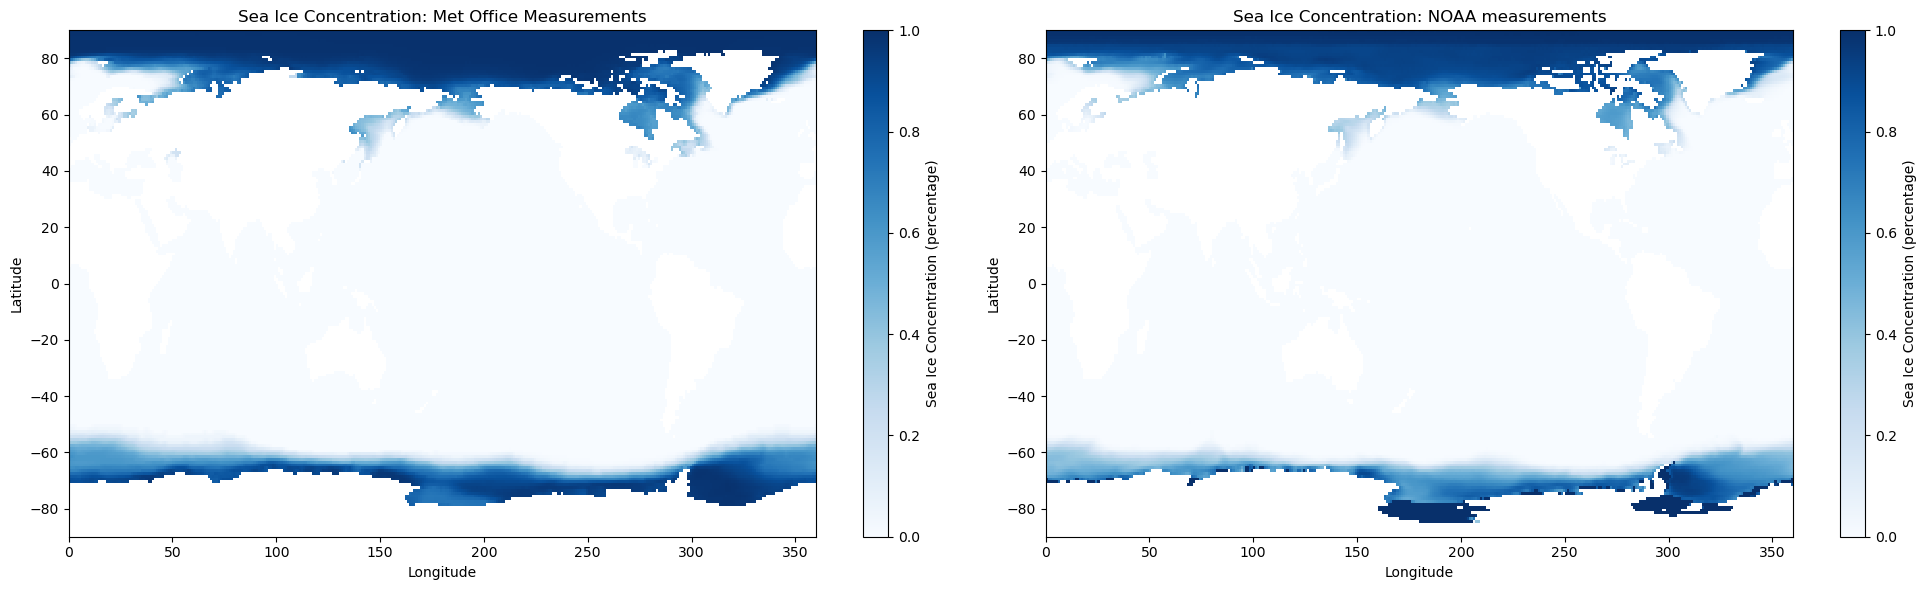

In [142]:
# Example usage for two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Create 1 row and 2 columns of subplots

# Dataset 1
plot_heatmap(ds_0, axes[0], title="Sea Ice Concentration: Met Office Measurements")

# Dataset 2
plot_heatmap(ds_1, axes[1], title="Sea Ice Concentration: NOAA measurements")

plt.tight_layout()  # Adjust spacing between plots
plt.show()

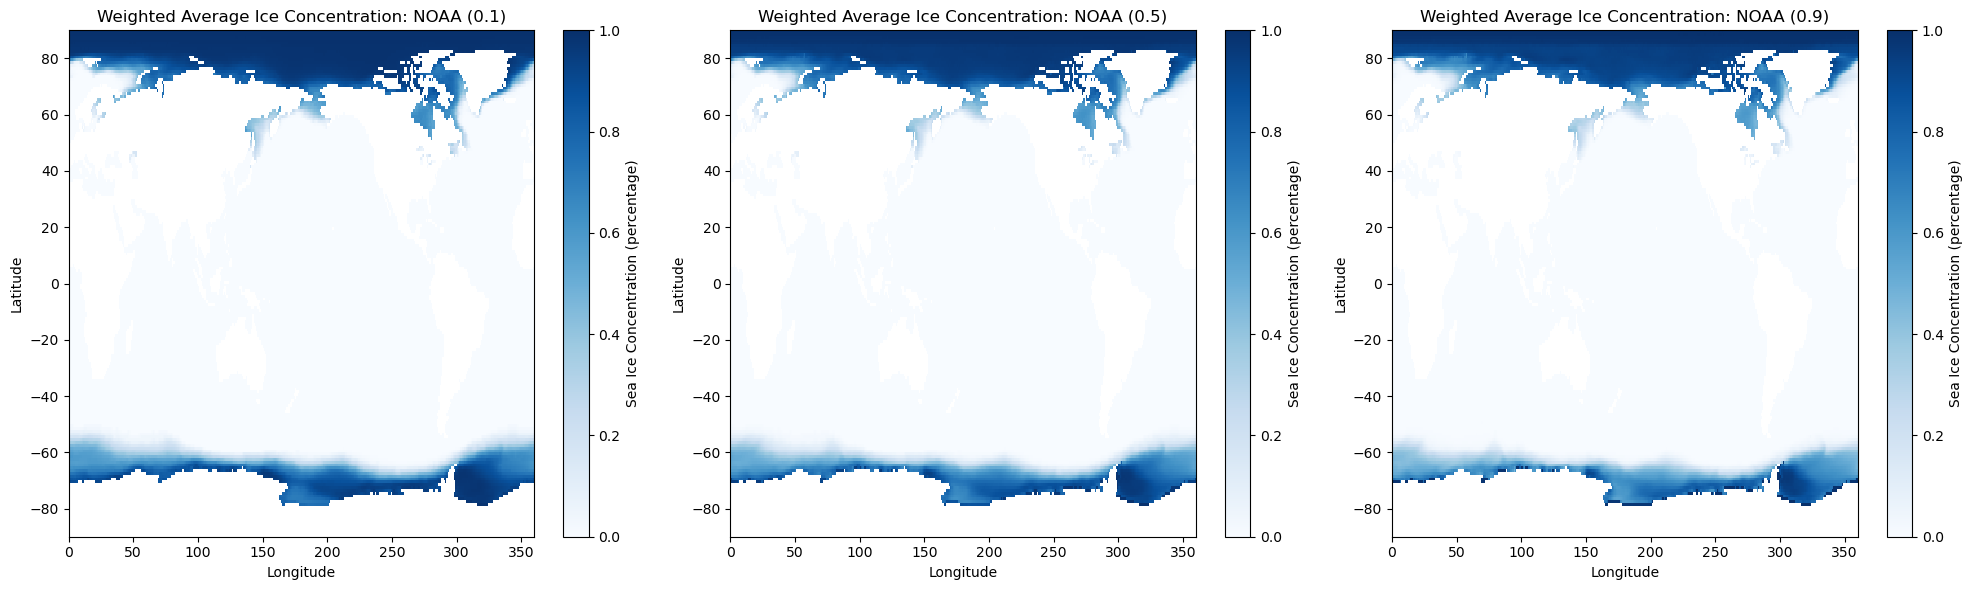

In [143]:
# Example usage for two side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Create 1 row and 2 columns of subplots

plot_heatmap(met_confident, axes[0], title="Weighted Average Ice Concentration: NOAA (0.1)")

plot_heatmap(equal_confidence, axes[1], title="Weighted Average Ice Concentration: NOAA (0.5)")

plot_heatmap(noa_confident, axes[2], title="Weighted Average Ice Concentration: NOAA (0.9)")


plt.tight_layout()  # Adjust spacing between plots
plt.show()

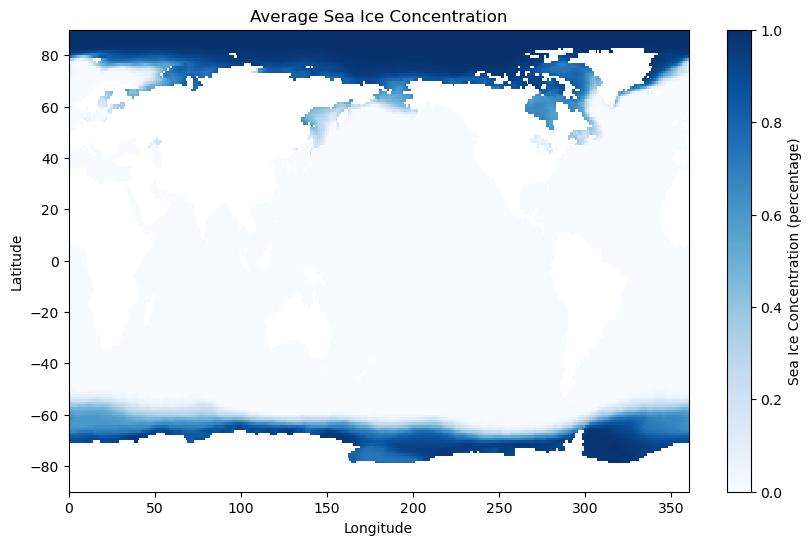

In [130]:
plot_heatmap(ds_0)

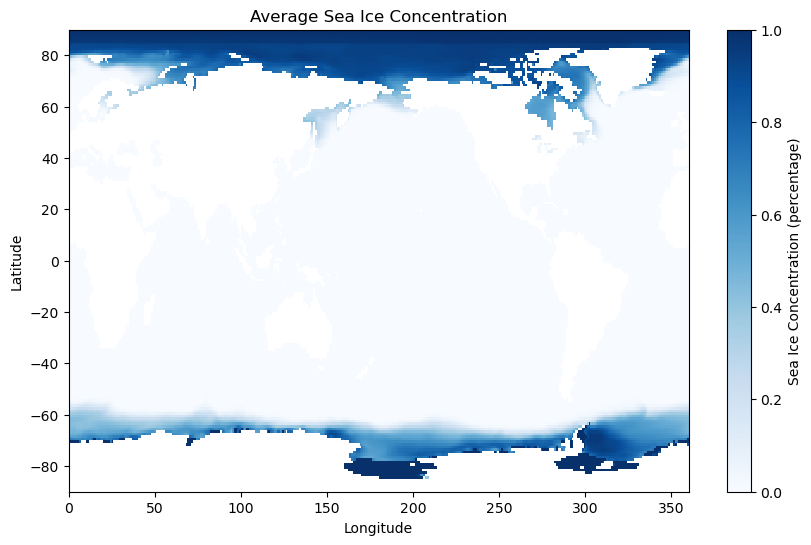

In [131]:
plot_heatmap(ds_1)

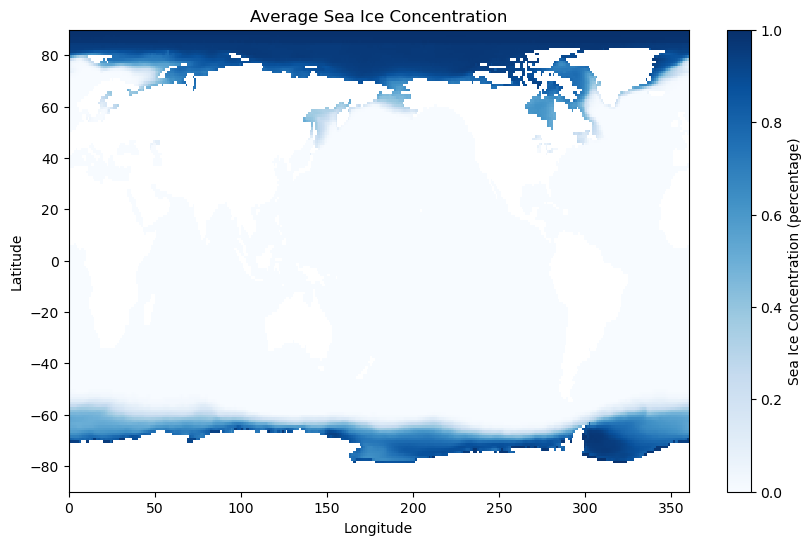

In [135]:
plot_heatmap(equal_confidence)

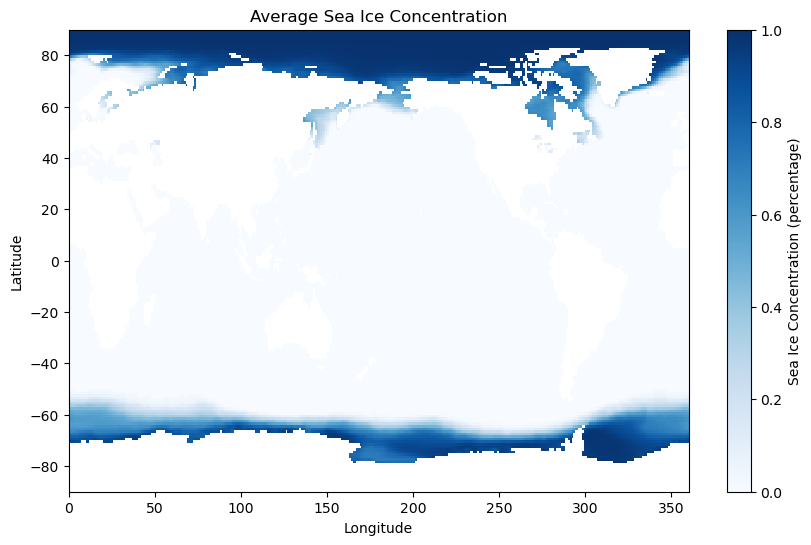

In [136]:
plot_heatmap(met_confident)

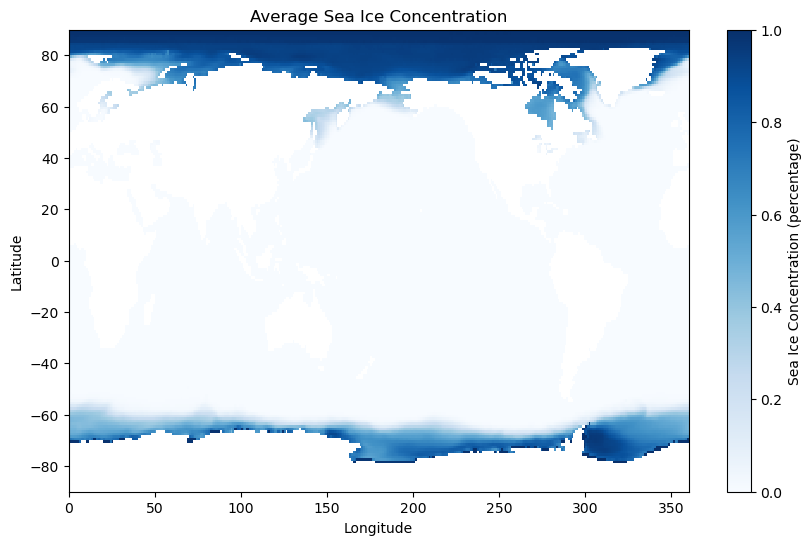

In [137]:
plot_heatmap(noa_confident)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)  # 1 row, 2 columns
# Plot the first heatmap
im1 = axes[0].pcolormesh(lon1, lat1, data1, cmap='coolwarm', shading='auto', vmin=0, vmax=30)
axes[0].set_title('Heatmap 1')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
fig.colorbar(im1, ax=axes[0], label='Sea Level Temperature')

# Plot the second heatmap
im2 = axes[1].pcolormesh(lon2, lat2, data2, cmap='coolwarm', shading='auto', vmin=0, vmax=30)
axes[1].set_title('Heatmap 2')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
fig.colorbar(im2, ax=axes[1], label='Sea Level Temperature')

# Show the plots
plt.show()